In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn

start = datetime(2018,1,1)
symbols_list = ['IAU','MRK','PEP','PG','MSFT','AAPL','COST','BIIB','WMT','NVO','UNH','NVDA','MC','ABBV','LIGHT','TTE']


In [2]:
symbols = []

for ticker in symbols_list:
    r = yf.download(ticker, start=start)
    r['Symbol'] = ticker
    symbols.append(r)

df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date','Close','Symbol']]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [10]:
df_pivot = df.pivot(index='Date', columns='Symbol', values='Close').reset_index()
df_pivot.tail()

Symbol,Date,AAPL,ABBV,BIIB,COST,IAU,MC,MRK,MSFT,NVDA,NVO,PEP,PG,TTE,UNH,WMT
1318,2023-03-29,160.770004,158.000000,274.010010,490.869995,37.240002,37.490002,104.919998,280.510010,269.839996,156.580002,180.669998,146.809998,58.160000,466.589996,144.229996
1319,2023-03-30,162.360001,157.919998,275.130005,491.480011,37.570000,37.150002,105.919998,284.049988,273.829987,158.089996,180.830002,147.449997,59.139999,470.059998,145.669998
1320,2023-03-31,164.899994,159.369995,278.029999,496.869995,37.369999,38.439999,106.389999,288.299988,277.769989,159.139999,182.300003,148.690002,59.049999,472.589996,147.449997
1321,2023-04-03,166.169998,160.419998,277.339996,497.029999,37.650002,37.959999,108.870003,287.230011,279.649994,159.600006,182.500000,149.509995,63.139999,494.190002,148.690002
1322,2023-04-04,165.350006,159.600006,274.355011,497.309998,38.334999,37.139999,108.595001,286.170013,274.290009,157.955002,181.520004,150.440002,61.889999,492.670013,147.154999


In [11]:
corr_df = df_pivot.corr(method='pearson')
corr_df.head().reset_index()
# del corr_df.index.name
corr_df.head(10)

/var/folders/qg/30kvbc515r13cnklb4ttgl9m0000gn/T/ipykernel_48512/1304817794.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df_pivot.corr(method='pearson')


Symbol,AAPL,ABBV,BIIB,COST,IAU,MC,MRK,MSFT,NVDA,NVO,PEP,PG,TTE,UNH,WMT
Symbol,,,,,,,,,,,,,,,
AAPL,1.000000,0.789532,-0.375039,0.956978,0.861842,0.281918,0.579765,0.971947,0.924482,0.878601,0.895824,0.895055,-0.223043,0.924864,0.887142
ABBV,0.789532,1.000000,-0.300346,0.799518,0.564741,0.286605,0.556536,0.692047,0.746416,0.885103,0.786728,0.591774,0.231861,0.904690,0.569877
BIIB,-0.375039,-0.300346,1.000000,-0.456199,-0.338438,0.202408,-0.308927,-0.353542,-0.283533,-0.319575,-0.441055,-0.457366,0.058644,-0.371315,-0.292852
COST,0.956978,0.799518,-0.456199,1.000000,0.803522,0.170058,0.691777,0.939687,0.889279,0.917155,0.954297,0.907830,-0.151175,0.949487,0.857580
IAU,0.861842,0.564741,-0.338438,0.803522,1.000000,-0.008053,0.546708,0.867086,0.764202,0.726849,0.765824,0.891695,-0.521396,0.708897,0.917343
MC,0.281918,0.286605,0.202408,0.170058,-0.008053,1.000000,-0.296168,0.294032,0.467559,0.201203,0.042691,-0.012405,0.325231,0.236317,0.061172
MRK,0.579765,0.556536,-0.308927,0.691777,0.546708,-0.296168,1.000000,0.552274,0.444718,0.753990,0.809635,0.699479,0.041045,0.689484,0.624100
MSFT,0.971947,0.692047,-0.353542,0.939687,0.867086,0.294032,0.552274,1.000000,0.935938,0.843320,0.874726,0.915629,-0.301499,0.872251,0.895194
NVDA,0.924482,0.746416,-0.283533,0.889279,0.764202,0.467559,0.444718,0.935938,1.000000,0.856282,0.793629,0.790479,-0.108565,0.837344,0.780571


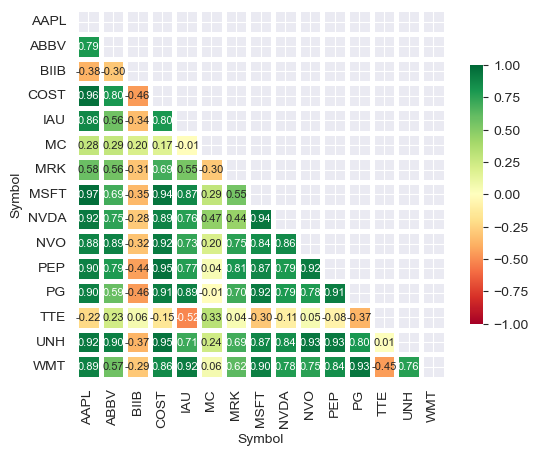

In [17]:
 #take the bottom triangle since it repeats itself
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#generate plot
seaborn.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5, annot=True, annot_kws={"size": 8}, fmt='.2f', square=True, cbar_kws={"shrink": .70}, xticklabels=True, yticklabels=True, cbar=True, cbar_ax=None, ax=None)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()